In [1]:
import sys
sys.path.append('.')
sys.path.append('./muscle_modelling')

import numpy as np
import itertools
from tqdm import tqdm
import matplotlib.pyplot as plt

from simulate import simulate
from muscle_modelling.regression import get_muscle_force_length_regression,\
                       get_muscle_force_velocity_regression

  0%|                                                     | 0/6 [00:00<?, ?it/s]/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 17%|███████▌                                     | 1/6 [00:40<03:23, 40.71s/it]/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no 

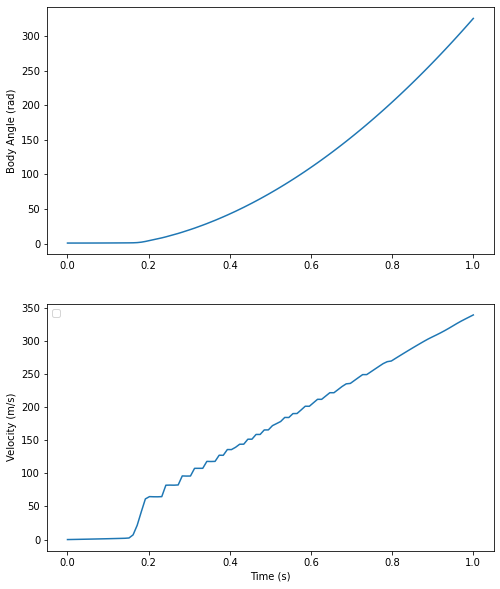

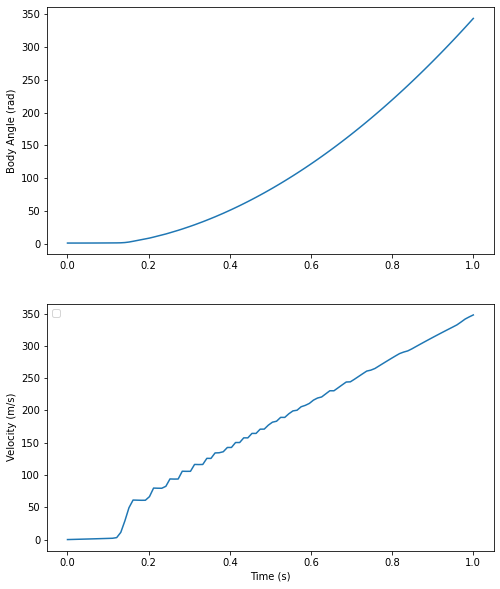

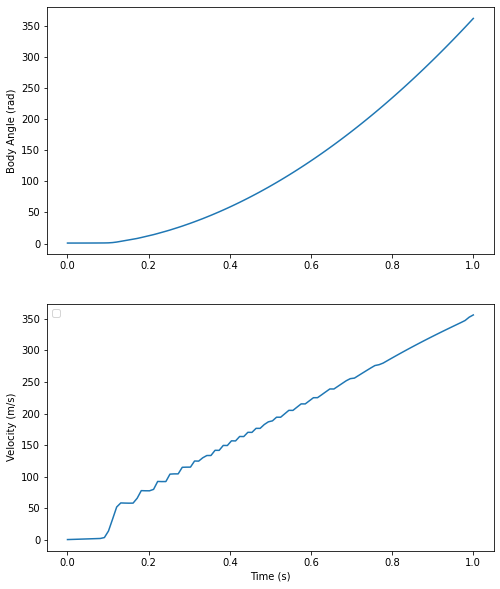

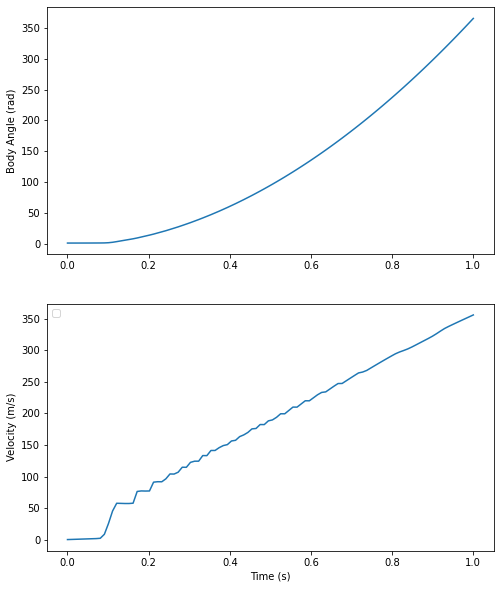

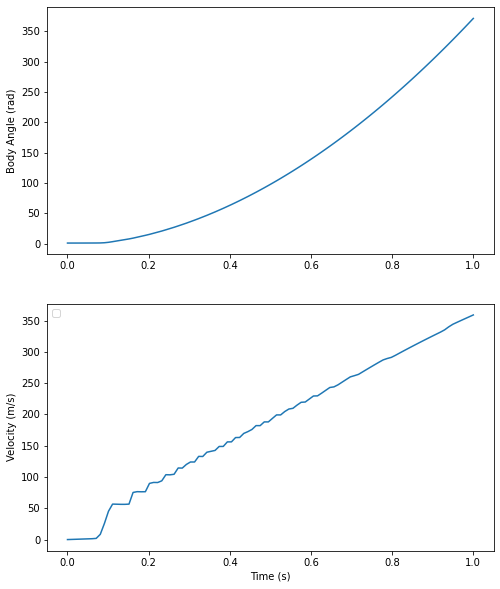

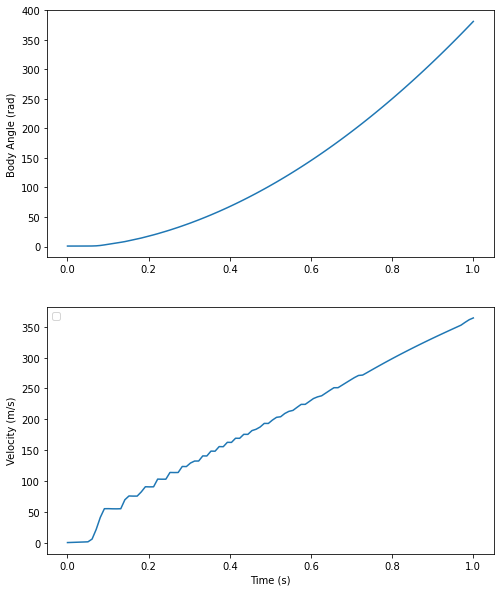

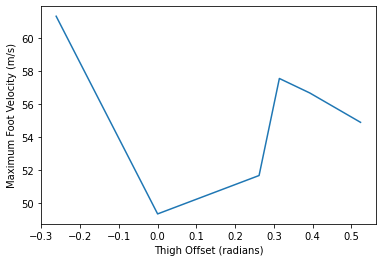

In [2]:
force_length_regression = get_muscle_force_length_regression()
force_velocity_regression = get_muscle_force_velocity_regression()

# SIMULATION 1

# define parameter sets
T = 1
initial_thetas = [np.pi/4]
thigh_offsets = [-np.pi/12, 0, np.pi/12, np.pi/10, np.pi/8, np.pi/6]
femoris_activation_funcs = [lambda x: 1]
lateralis_activation_funcs = [lambda x: 1]
medialis_activation_funcs = [lambda x: 1]
intermedius_activation_funcs = [lambda x: 1]

# Generate all possible combinations using itertools.product
param_combinations = list(itertools.product(
    initial_thetas, thigh_offsets, femoris_activation_funcs, 
    lateralis_activation_funcs, medialis_activation_funcs, 
    intermedius_activation_funcs))

max_velocities = np.zeros(len(thigh_offsets))

# Execute each combination
for i, combination in enumerate(tqdm(param_combinations)):
    initialCondition = [combination[0], 0, 1, 1, 1, 1]
    thigh_offset = combination[1]
    get_femoris_activation = combination[2]
    get_lateralis_activation = combination[3]
    get_medialis_activation = combination[4]
    get_intermedius_activation = combination[5]

    fig, results = simulate(T, initialCondition, thigh_offset, get_femoris_activation, 
                get_lateralis_activation, get_medialis_activation, get_intermedius_activation, 
                force_length_regression, force_velocity_regression)

    max_velocities[i] = results['max_velocity']

fig = plt.figure()
plt.plot(thigh_offsets, max_velocities, linewidth=1.5)
plt.ylabel('Maximum Foot Velocity (m/s)')
plt.xlabel('Thigh Offset (radians)')
plt.show()
fig.savefig('thigh_offset_sweep.png')

  0%|                                                     | 0/6 [00:00<?, ?it/s]/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 17%|███████▌                                     | 1/6 [00:26<02:12, 26.44s/it]/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no 

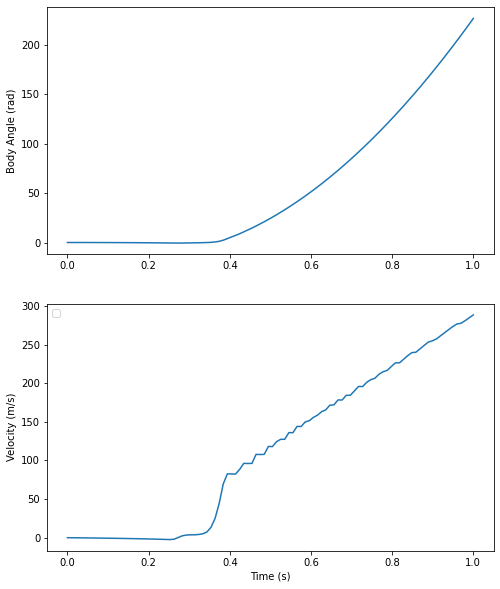

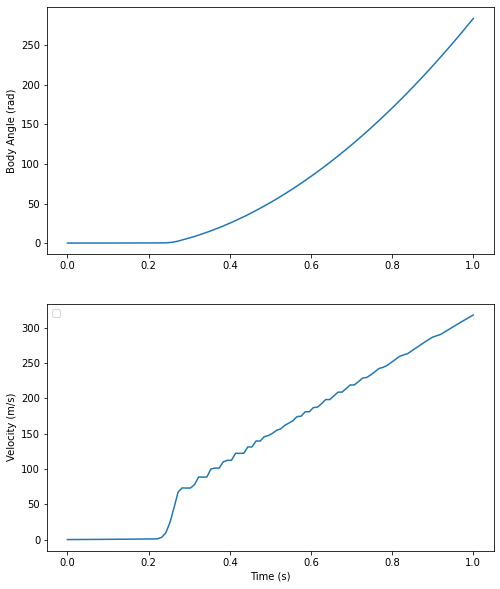

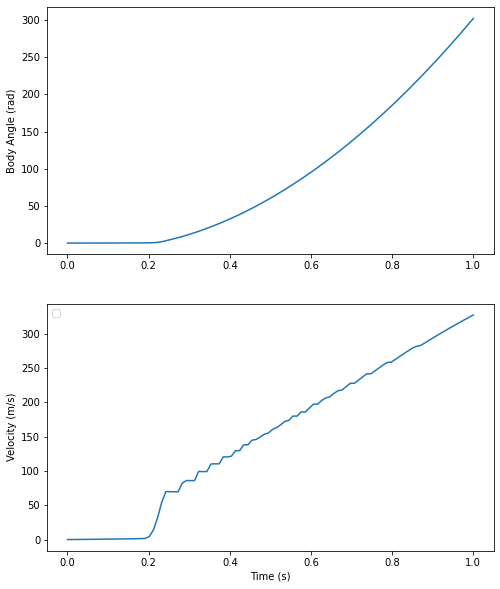

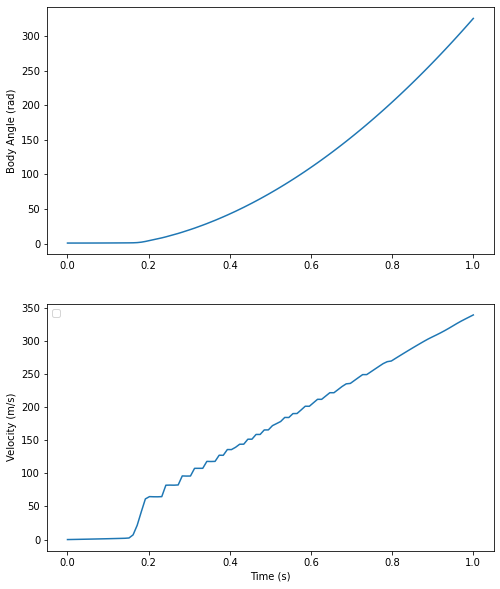

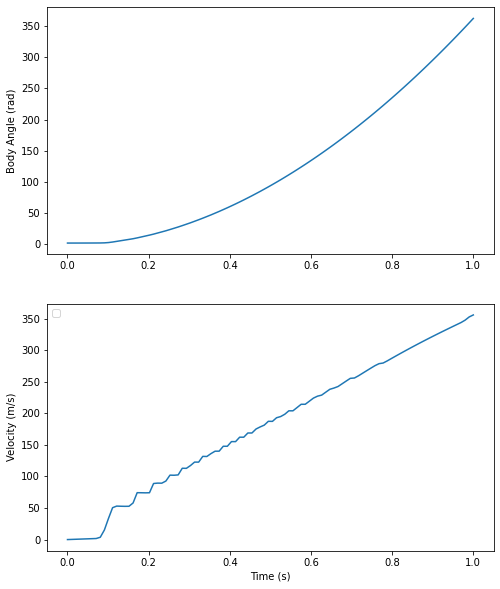

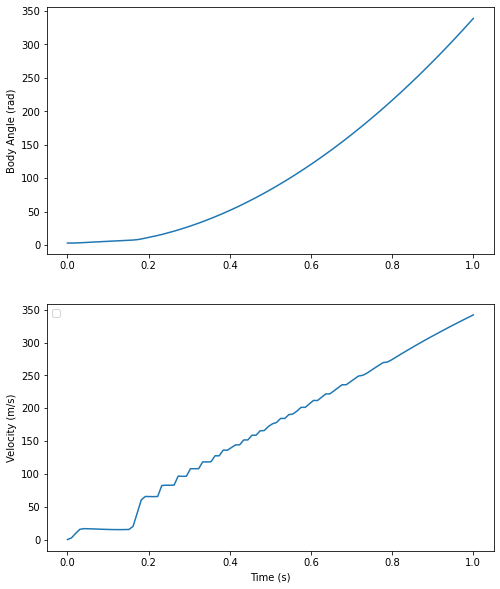

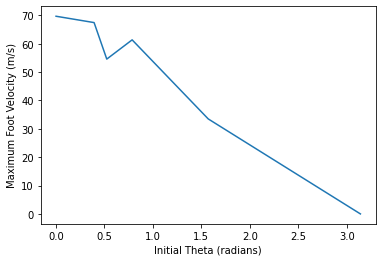

In [3]:
force_length_regression = get_muscle_force_length_regression()
force_velocity_regression = get_muscle_force_velocity_regression()

# SIMULATION 2

# define parameter sets
T = 1
initial_thetas = [0, np.pi/8, np.pi/6, np.pi/4, np.pi/2, np.pi]
thigh_offsets = [-np.pi/12]
femoris_activation_funcs = [lambda x: 1]
lateralis_activation_funcs = [lambda x: 1]
medialis_activation_funcs = [lambda x: 1]
intermedius_activation_funcs = [lambda x: 1]

# Generate all possible combinations using itertools.product
param_combinations = list(itertools.product(
    initial_thetas, thigh_offsets, femoris_activation_funcs, 
    lateralis_activation_funcs, medialis_activation_funcs, 
    intermedius_activation_funcs))

max_velocities = np.zeros(len(initial_thetas))

# Execute each combination
for i, combination in enumerate(tqdm(param_combinations)):
    initialCondition = [combination[0], 0, 1, 1, 1, 1]
    thigh_offset = combination[1]
    get_femoris_activation = combination[2]
    get_lateralis_activation = combination[3]
    get_medialis_activation = combination[4]
    get_intermedius_activation = combination[5]

    fig, results = simulate(T, initialCondition, thigh_offset, get_femoris_activation, 
                get_lateralis_activation, get_medialis_activation, get_intermedius_activation, 
                force_length_regression, force_velocity_regression)

    max_velocities[i] = results['max_velocity']

fig = plt.figure()
plt.plot(initial_thetas, max_velocities, linewidth=1.5)
plt.ylabel('Maximum Foot Velocity (m/s)')
plt.xlabel('Initial Theta (radians)')
plt.show()
fig.savefig('initial_theta_sweep.png')

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 25%|███████████▎                                 | 1/4 [00:02<00:07,  2.64s/it]/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no 

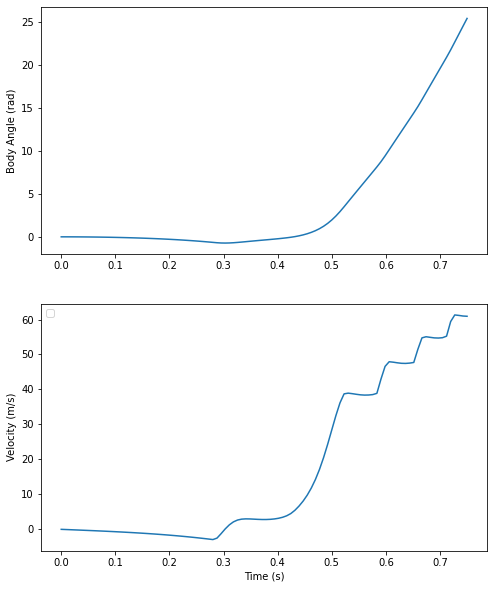

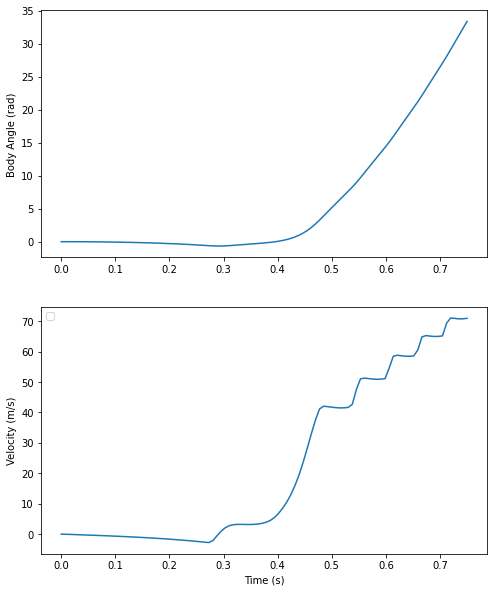

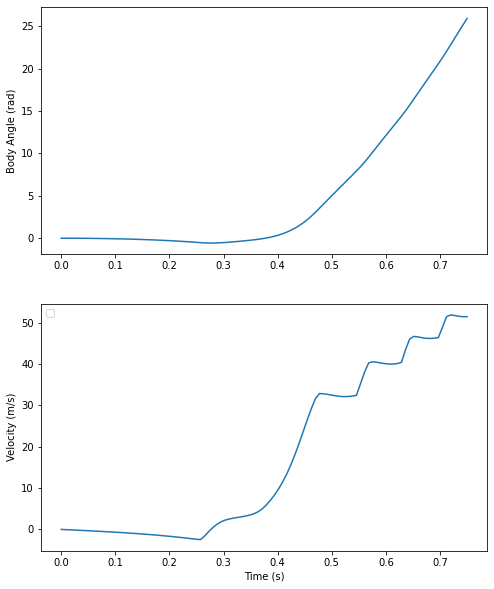

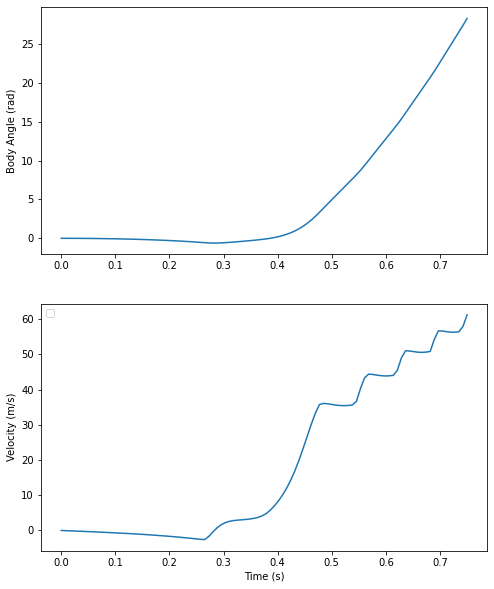

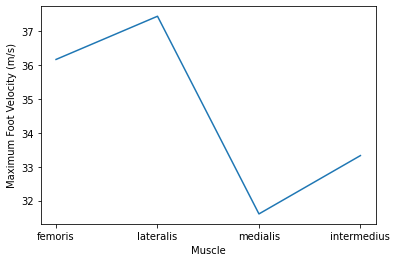

In [4]:
force_length_regression = get_muscle_force_length_regression()
force_velocity_regression = get_muscle_force_velocity_regression()

# SIMULATION 3

# define parameter sets
T = 0.75
muscles = ['femoris', 'lateralis', 'medialis', 'intermedius']

max_velocities = np.zeros(4)

# Execute each combination
for i, muscle in enumerate(tqdm(muscles)):
    initialCondition = [0, 0, 1, 1, 1, 1]
    thigh_offset = -np.pi/12

    if muscle == 'femoris':
        get_femoris_activation = lambda x: 1
    else:
        get_femoris_activation = lambda x: 0
    if muscle == 'lateralis':
        get_lateralis_activation = lambda x: 1
    else:
        get_lateralis_activation = lambda x: 0
    if muscle == 'medialis':
        get_medialis_activation = lambda x: 1
    else:
        get_medialis_activation = lambda x: 0
    if muscle == 'intermedius':
        get_intermedius_activation = lambda x: 1
    else:
        get_intermedius_activation = lambda x: 0

    fig, results = simulate(T, initialCondition, thigh_offset, get_femoris_activation, 
                get_lateralis_activation, get_medialis_activation, get_intermedius_activation, 
                force_length_regression, force_velocity_regression)

    max_velocities[i] = results['max_velocity']

fig = plt.figure()
plt.plot(muscles, max_velocities, linewidth=1.5)
plt.ylabel('Maximum Foot Velocity (m/s)')
plt.xlabel('Muscle')
plt.show()
fig.savefig('muscle_sweep.png')

  7%|██▉                                         | 1/15 [00:28<06:39, 28.55s/it]/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 13%|█████▊                                      | 2/15 [00:56<06:03, 27.96s/it]/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no 

The Best Params Are:
Initial Theta:  0
Thigh Offset:  0


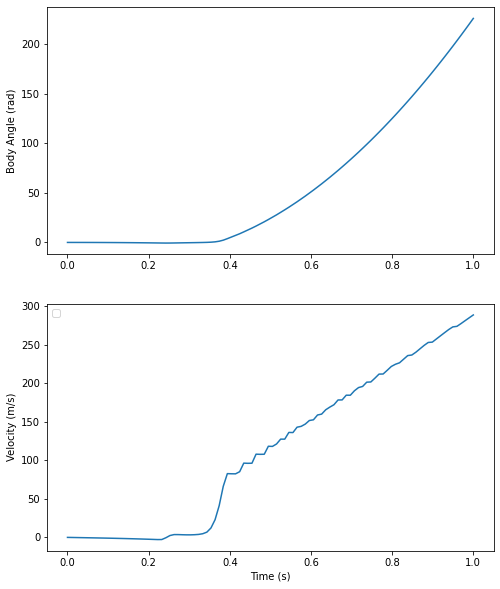

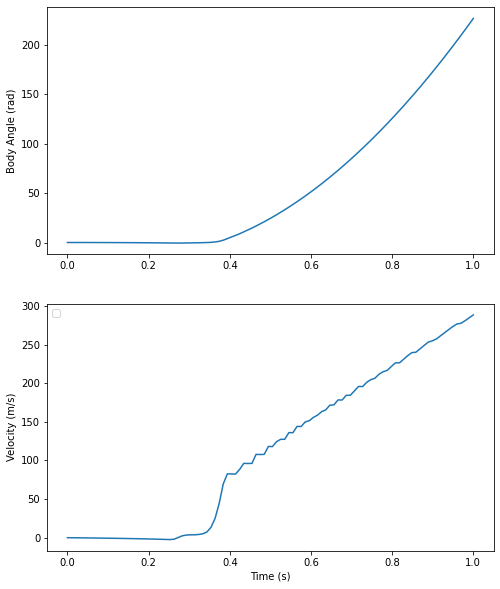

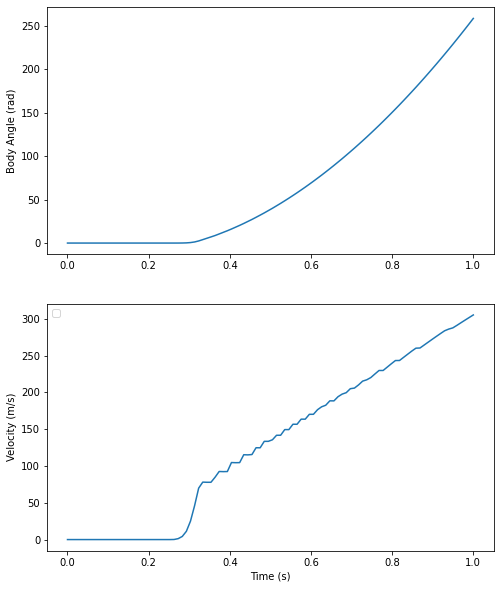

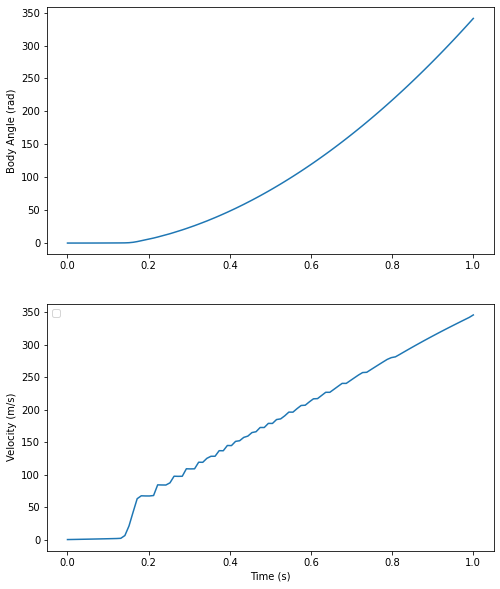

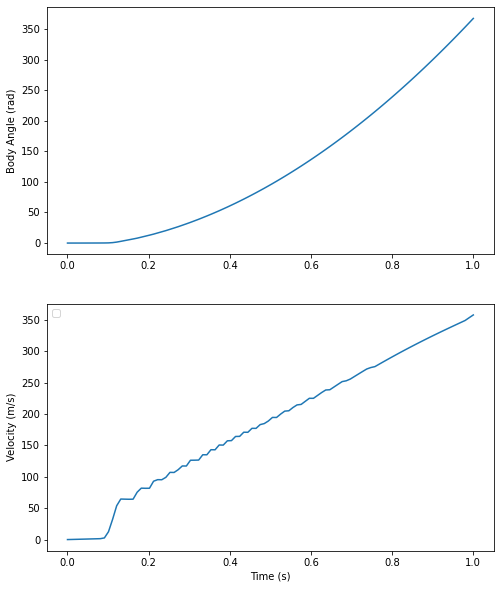

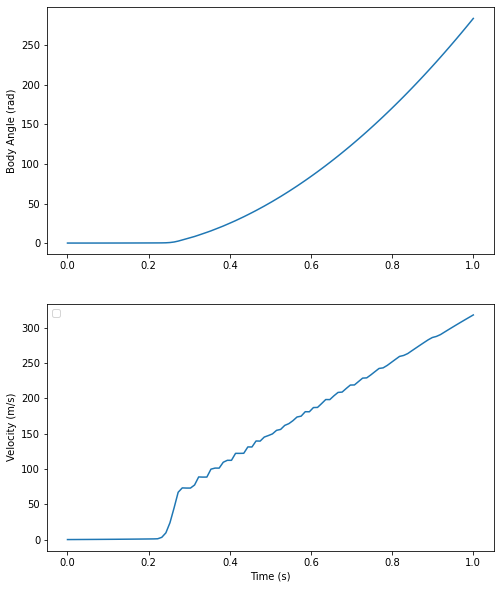

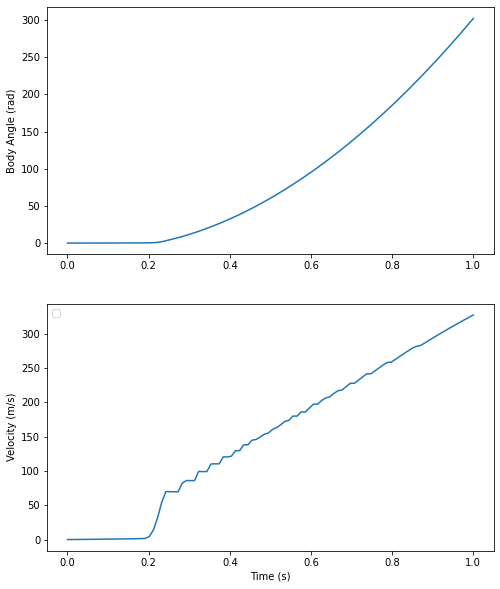

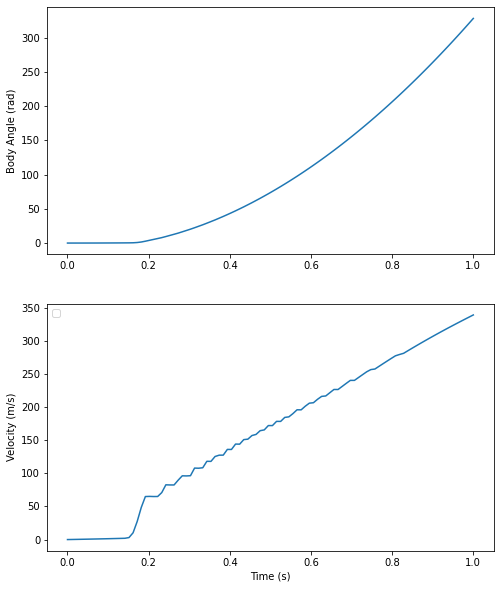

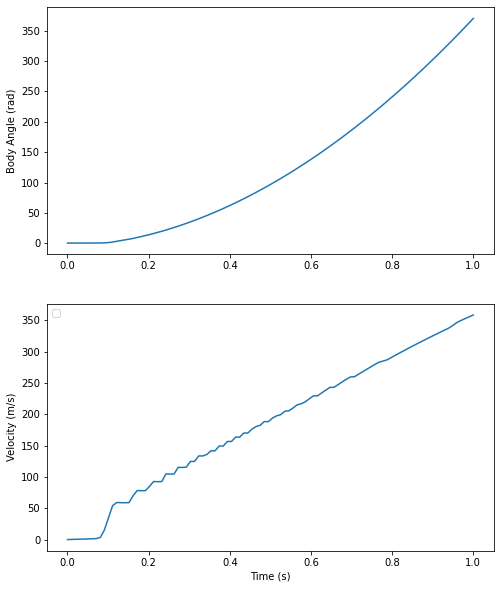

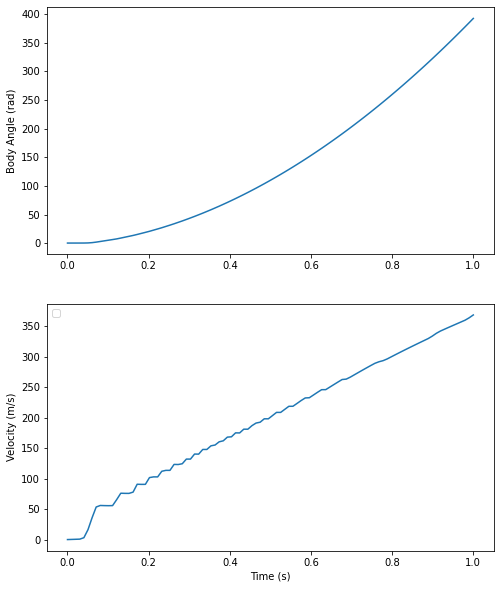

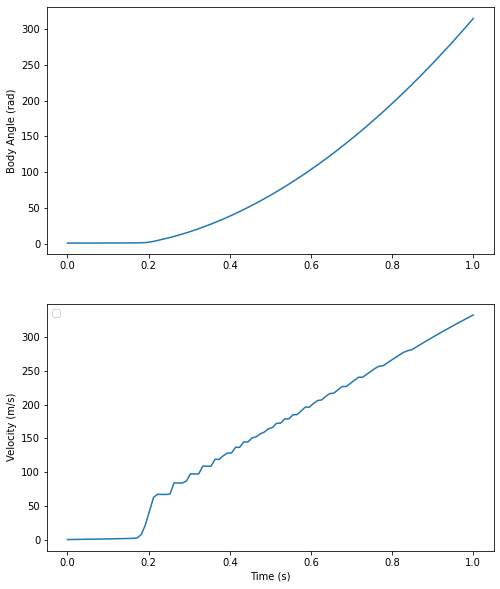

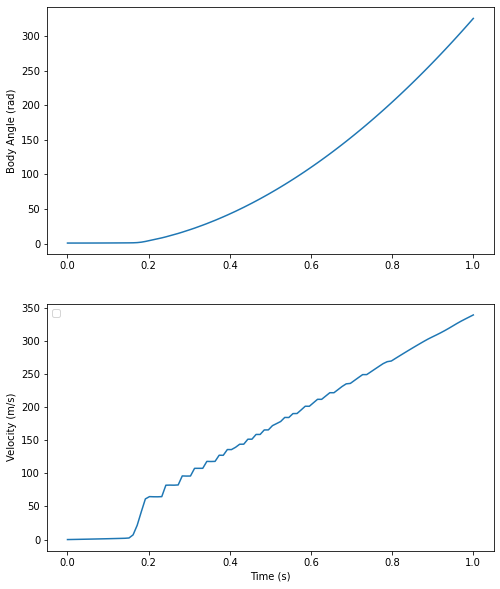

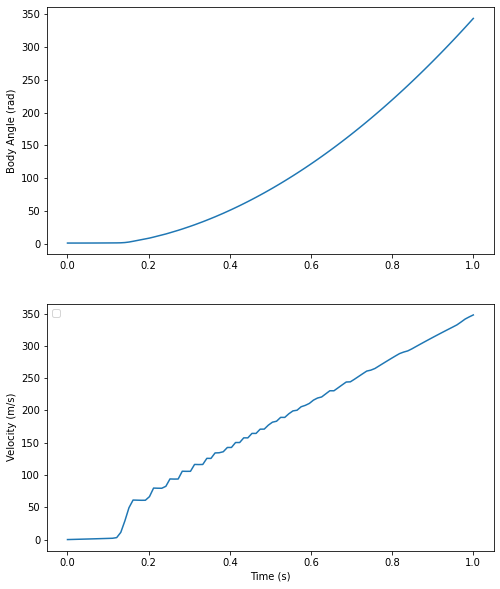

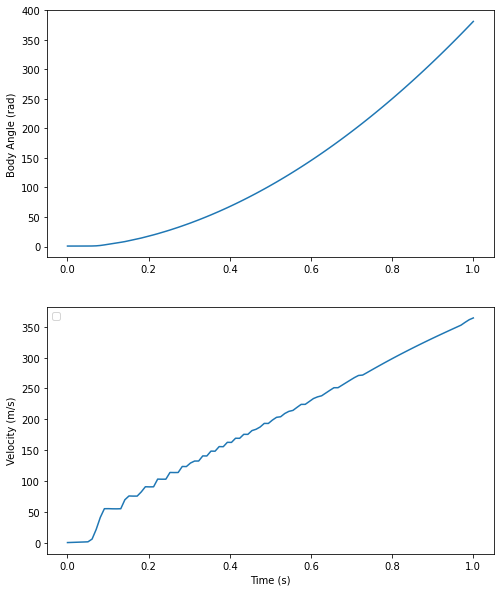

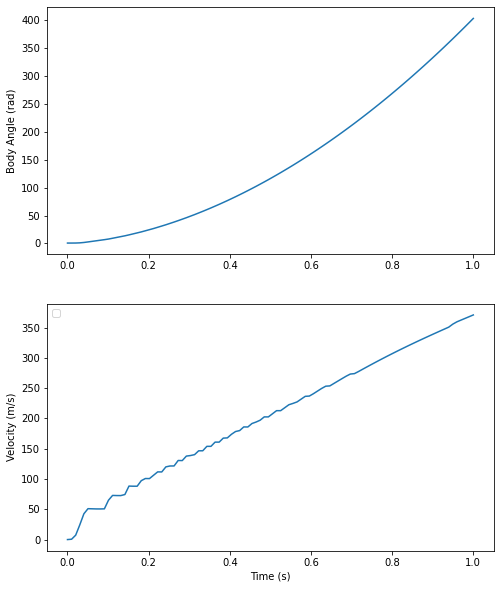

In [5]:
force_length_regression = get_muscle_force_length_regression()
force_velocity_regression = get_muscle_force_velocity_regression()

# SIMULATION 4

# define parameter sets
T = 1
initial_thetas = [0, np.pi/6, np.pi/4]
thigh_offsets = [-np.pi/8, -np.pi/12, 0, np.pi/6, np.pi/4]
femoris_activation_funcs = [lambda x: 1]
lateralis_activation_funcs = [lambda x: 1]
medialis_activation_funcs = [lambda x: 1]
intermedius_activation_funcs = [lambda x: 1]

# Generate all possible combinations using itertools.product
param_combinations = list(itertools.product(
    initial_thetas, thigh_offsets, femoris_activation_funcs, 
    lateralis_activation_funcs, medialis_activation_funcs, 
    intermedius_activation_funcs))

max_velocities = np.zeros(len(param_combinations))

# Execute each combination
for i, combination in enumerate(tqdm(param_combinations)):
    initialCondition = [combination[0], 0, 1, 1, 1, 1]
    thigh_offset = combination[1]
    get_femoris_activation = combination[2]
    get_lateralis_activation = combination[3]
    get_medialis_activation = combination[4]
    get_intermedius_activation = combination[5]

    fig, results = simulate(T, initialCondition, thigh_offset, get_femoris_activation, 
                get_lateralis_activation, get_medialis_activation, get_intermedius_activation, 
                force_length_regression, force_velocity_regression)

    max_velocities[i] = results['max_velocity']

max_velocity_idx = np.argmax(max_velocities)
best_params = param_combinations[max_velocity_idx]
print("The Best Params Are:")
print("Initial Theta: ", best_params[0])
print("Thigh Offset: ", best_params[1])

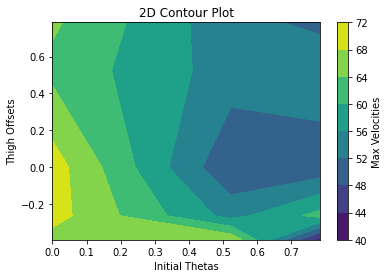

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Your provided data
initial_thetas = np.array([0, np.pi/6, np.pi/4])
thigh_offsets = np.array([-np.pi/8, -np.pi/12, 0, np.pi/6, np.pi/4])

# Reshape max_velocities into a 2D array
max_velocities_2D = np.reshape(max_velocities, (len(initial_thetas), len(thigh_offsets)))

# Create a meshgrid for initial_thetas and thigh_offsets
theta_mesh, offset_mesh = np.meshgrid(initial_thetas, thigh_offsets, indexing='ij')

# Create a 2D contour plot
plt.figure()
cp = plt.contourf(theta_mesh, offset_mesh, max_velocities_2D)
plt.colorbar(cp, label="Max Velocities")
plt.xlabel("Initial Thetas")
plt.ylabel("Thigh Offsets")
plt.title("2D Contour Plot")
plt.show()
